In [1]:
%load_ext autoreload
%autoreload 2
from sympy import *
import numpy as np
import matplotlib.pyplot as plt



from bezierClarifiedVerssion import *#A,SY,B,R,N,Exp,ExpX,MinimisationExp,Y,X,Bsol,Nsol,BY,NY,Nsol,Ysol,S,res,rosen

Optimization terminated successfully.
         Current function value: 0.160385
         Iterations: 412
         Function evaluations: 703


# reflexion visualisation

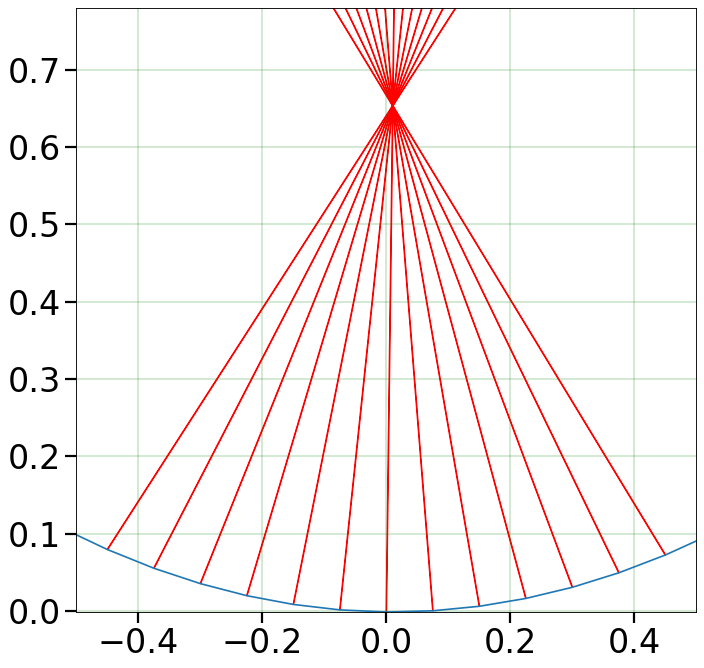

In [2]:
#ax = plt.axes(autoscale_on=False,xlim= {-2,  2},ylim= {0,  8000})
idx=nb
#plt.subplots(figsize=(6, 2))
plt.figure(figsize=(10,10), dpi=80)

#plt.tight_layout(pad=5)
#ax = plt.axes(autoscale_on=False,xlim= {X[idx]-width,  X[idx]+width},ylim= {min(Ysol),  concentrationPoint*2+0.1})
ax = plt.axes(autoscale_on=False,xlim= {-0.5,0.5},ylim= {min(Ysol),  concentrationPoint*1.2})
ax.tick_params(axis='both', which='major', labelsize=30,length=10,width=2)
ax.grid(color='g', linestyle='-', linewidth=0.3)
#ax.invert_xaxis()
ax.invert_yaxis()
#ax.set_xticks([])
#ax.set_yticks([])
#ax.axis('off')
ax.plot(X,Ysol)
norm=sqrt(max(X)**2+max(Ysol)**2)
lightSource=(S)#+0.5*R.x)
#lightSource=R.y
ax.arrow(X[-1]+float(lightSource&R.x), Ysol[-1]+float(lightSource&R.y),-float(lightSource&R.x),-float(lightSource&R.y),color='green')

for i in range(0,len(X),1):
    #ax.arrow(X[i], Ysol[i], float(Nsol[i]&R.x)/float(0.01+sqrt(int(Nsol[i]&R.x)**2+float( Nsol[i]&R.y)**2)),float( Nsol[i]&R.y)/float(0.01+sqrt(int(Nsol[i]&R.x)**2+float( Nsol[i]&R.y)**2)))
    if (X[i]>-0.5 and X[i]<0.5):
        reflection=2*(Nsol[i]&lightSource)*Nsol[i]/(Nsol[i]&Nsol[i])-lightSource
        #t=2*(NY[i]&S)*NY[i]/(NY[i]&NY[i])-S
        reflection/=sqrt(reflection&reflection)
        reflection*=norm*width*10

        #print((t+sqrt(t&t)*S/sqrt(S&S))^Nsol[i])
        ax.arrow(X[i], Ysol[i],float(reflection&R.x),float(reflection&R.y),color='red')
        #ax.arrow(X[i], Ysol[i],int(S&R.x),int(S&R.y),color='green')
plt.savefig("largeGridRefrence10cm.pdf")

In [3]:
from ConeComputations import *
import pandas as pd


pd.set_option("display.precision", 2)
df = pd.DataFrame(  columns =  ["X1", "X2", "alpha","VoidRadius(OnPlane)","couroneRadius(OnPlane)","litleCircleRadius(3D)","largeCircleRadius(3D)"])
XX=[X[i]  for i in range(nb,len(X),3)]
YY=[Ysol[i]  for i in range(nb,len(X),3)]
for i in range(0,len(XX)-1):
    X1=[round(XX[i],3),round(YY[i],3)]
    X2=[round(XX[i+1],3),round(YY[i+1],3)]
    df.loc[i] = [X1,X2,360-alpha(X1,X2)*180/pi,VoidRadius(X1,X2),couroneRadius(X1,X2),
                 X1[0],X2[0]]
    print(alpha(X1,X2))

df

6.26532750108539
6.09717580087721
5.78838170850604
5.39834305545984
4.99172711499540
4.58318216233153


,X1,X2,alpha,VoidRadius(OnPlane),couroneRadius(OnPlane),litleCircleRadius(3D),largeCircleRadius(3D)
0,"[0.0, -0.001]","[0.225, 0.016]",1.02317692058409,8.67361737988404e-19,0.225641308274881,0.00,0.23
1,"[0.225, 0.016]","[0.45, 0.072]",10.6575596604611,0.231864184383876,0.231864184383876,0.23,0.45
2,"[0.45, 0.072]","[0.675, 0.167]",28.3501578919012,0.488466989672793,0.244233494836396,0.45,0.68
3,"[0.675, 0.167]","[0.9, 0.301]",50.6977265584140,0.785639230181385,0.261879743393795,0.68,0.90
4,"[0.9, 0.301]","[1.125, 0.473]",73.9951038297677,1.13284773910707,0.283211934776767,0.90,1.12
5,"[1.125, 0.473]","[1.35, 0.684]",97.4030053587780,1.54228726247739,0.308457452495478,1.12,1.35


6.265327501084977
6.097175800876811
5.788381708505656
5.398343055459488
4.991727114995074
4.583182162331229


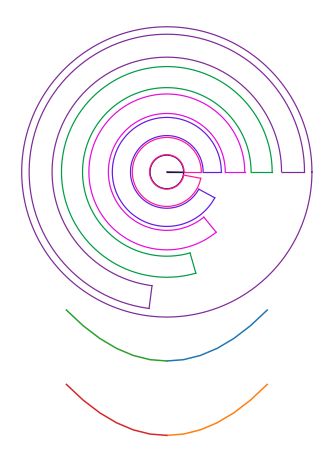

In [20]:
import matplotlib.colors as mcolors
cm = 1/2.54 
figure, axes = plt.subplots(1,figsize=(21*cm, 21*cm),linewidth=1.22)

for i in range (len(df.index)):
    print((360-float(df.loc[i,"alpha"]))*np.pi/180)
    cc=np.random.rand(3)
    x,y=drawCircles(
        (360-float(df.loc[i,"alpha"]))*np.pi/180,
        df.loc[i,"VoidRadius(OnPlane)"])
    axes.plot( x, y,color=cc, linewidth=1.22)
    pt1=[x[-1],y[-1]]
    pt1p=[x[0],y[0]]
    x,y=drawCircles(
        (360-float(df.loc[i,"alpha"]))*np.pi/180,
        df.loc[i,"VoidRadius(OnPlane)"]+df.loc[i,"couroneRadius(OnPlane)"])
    axes.plot( x, y,color=cc, linewidth=1.22)
    pt2=[x[-1],y[-1]]
    pt2p=[x[0],y[0]]
    axes.plot( [pt1[0],pt2[0]], [pt1[1],pt2[1]],color=cc, linewidth=1.22)
    axes.plot( [pt1p[0],pt2p[0]], [pt1p[1],pt2p[1]],color=cc, linewidth=1.22)
x,y=drawCircles(
        2*np.pi,
        df.loc[i,"VoidRadius(OnPlane)"]+df.loc[i,"couroneRadius(OnPlane)"]+0.1)
axes.plot(XX,YY-2.54*np.ones(len(XX)))
axes.plot(XX,YY-3.54*np.ones(len(XX)))
SymX=[-i for i in XX[::-1]]
axes.plot(SymX,YY[::-1]-2.54*np.ones(len(XX)))
axes.plot(SymX,YY[::-1]-3.54*np.ones(len(XX)))
axes.plot( x, y,color=cc, linewidth=1.22)
axes.axis('off')
axes.set_aspect( 1 )

plt.savefig("ConImage.pdf",orientation= 'portrait')

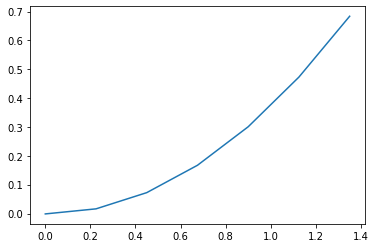

In [105]:
plt.plot(XX,YY)

In [34]:
from sympy import symbols,integrate
x = symbols('x') 
def f(x):
    return sum(BBcSol[j]*Bezier(j,deg,x) for j in range(len(BBcSol))) 
def g(x):
    return sqrt(1+diff(f(x),x)**2)

In [136]:
expr=integrate(g(x),(x,-1,1) )

In [137]:
expr

2.04421343910007

In [118]:
expr-ff(x)

-0.186664592297349*x**3 - 0.193485163618683*x**2*(1 - x) + 0.192012786260222*x**2 - 0.0102308610521722*x*(1 - x)**2 + 0.0162482798356832*x*(1 - x) - 0.00341028877996446*(1 - x)**3 + 0.00812414078553677*(1 - x)**2

In [110]:
integrate((ff(x)-expr)**2,(x,-1,1))

4.85886651545718e-5

In [64]:
RootOf(33554432*𝑥**4+8622238439930821*𝑥**3+553898481391524498112512*𝑥**2*(-15982493127537396)*𝑥+4123460112816791221174272,0)

CRootOf(33554432*x**4 - 8852678672193440515441218589654255567931*x**3 + 4123460112816791221174272, 0)

In [79]:


expr=integrate(gg(x),(x,-1,1) )


In [80]:
expr


1.0*Integral(sqrt(2.0910202458424e-9*x**3 + 0.134328565388535*x**2 - 3.87599071902251e-9*x + 1.0), (x, -1, 1))

In [18]:
expr.doit()

1.0*Integral(sqrt(2.0910202458424e-9*x**3 + 0.134328565388535*x**2 - 3.87599071902251e-9*x + 1.0), (x, -1, 1))

In [6]:
import scipy.integrate as integrate
def integrand(x):
    return g(x)
a=1
b=2
integrate.quad(integrand,0,1)#,args=(a,b))



ValueError: 
Can't calculate derivative wrt 0.500000000000000.